<a href="https://colab.research.google.com/github/Nil1927/Customer-Analytics-for-chips-category/blob/main/chips_purchase_analysis_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chips-purchase-analysis-part-1

Use the "Run" button to execute the code.

In [ ]:
pip install openpyxL

     |████████████████████████████████| 249 kB 14.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import datetime
from scipy import stats

In [ ]:
pip install mlxtend

     |████████████████████████████████| 1.4 MB 32.3 MB/s            
     |████████████████████████████████| 10.9 MB 71.7 MB/s            
     |████████████████████████████████| 301 kB 94.1 MB/s            
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Loading both data files ( Transactional and Customer)

In [ ]:
### Customer data file

df_customers=pd.read_csv("QVI_purchase_behaviour.csv")
df_customers

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
### Transaction data

df_transcation=pd.read_excel('QVI_transaction_data.xlsx')
df_transcation

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### Part-1 Exploratory Data Analysis for Transaction data

In [ ]:
## 1.1 Checking fomramt of all variables

df_transcation.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

#### Observation:

- All the numeric data value columns are in integer format.

- Date column is also having integer format , So it should be converted to date time format.

In [ ]:
## Date column conversion into date time format

base_date = datetime.datetime(1899, 12, 30)

converted_date = base_date+ pd.to_timedelta(df_transcation['DATE'],'D')

In [ ]:
df_transcation['actual_date'] = converted_date
df_transcation.dtypes

DATE                       int64
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
actual_date       datetime64[ns]
dtype: object

- As we can see there is new column created called Actual Date

- So drop the DATE column as it is not required.

In [ ]:
df_transcation.drop(['DATE'],axis=1,inplace=True)
df_transcation.head(10)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
5,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,2019-05-19
6,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16
7,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,2019-05-16
8,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20
9,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,2018-08-18


In [ ]:
### Product details

print(df_transcation['PROD_NAME'])

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object


In [ ]:
df_transcation['PROD_NAME']=df_transcation['PROD_NAME'].apply(lambda x: " ".join(x.split()))
df_transcation['PROD_NAME']

0                  Natural Chip Compny SeaSalt175g
1                            CCs Nacho Cheese 175g
2            Smiths Crinkle Cut Chips Chicken 170g
3            Smiths Chip Thinly S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832                Tostitos Splash Of Lime 175g
264833                       Doritos Mexicana 170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835                Tostitos Splash Of Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [ ]:
## Create the colum for category of products

df_transcation['PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt175g', 'CCs Nacho Cheese 175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour Cream&Chives 210G',
       'Kettle Sensations Siracha Lime 150g', 'Twisties Cheese 270g',
       'WW Crinkle Cut Chicken 175g', 'Thins Chips Light& Tangy 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream & Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt And Vinegar 175g',
       'Smiths Chip Thinly Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai Chilli&L

 - salsa products
-- As We can see in data there are other products apart from chips which are  salsa .We will remove those products from dataset as only chips analysis is required

In [ ]:
### Removing all salsa products from data frame

df_transcation=df_transcation[~df_transcation['PROD_NAME'].str.contains('salsa', case= False)]
df_transcation[df_transcation['PROD_NAME'].str.contains('salsa', case= False)]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date


### Basic statistical Analysis to find outliers

In [ ]:
df_transcation.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### Observation:
As it can be seen in Prod Qty column that there are instances where 200 packets of chips have been purchased in one transaction  which might make our analysis of data inaccurate . So will check how  many such transactions are there .

In [ ]:
df_transcation[df_transcation['PROD_QTY'] == 200]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


#### Observation:
So there are only two transaction in overall dataset of 200 units . So we will filter this out and remove it.

In [ ]:
df_transcation[~df_transcation['PROD_QTY'] == 200]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date


In [ ]:
df_transcation=df_transcation.drop(df_transcation[df_transcation['PROD_QTY'] == 200].index)

In [ ]:
df_transcation.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
a=df_transcation.groupby('actual_date')['TXN_ID'].count().reset_index()
a

,actual_date,TXN_ID
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [ ]:
missing_data = df_transcation[~df_transcation['actual_date'].notnull()]

In [ ]:
missing_data

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date


### Displaying  number of transaction  on monthly basis

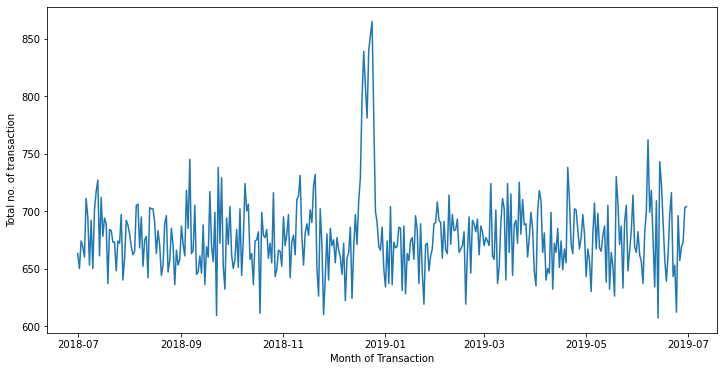

In [ ]:
plt.figure(figsize=(12,6))

plt.plot('actual_date','TXN_ID',data=a)

plt.xlabel('Month of Transaction')
plt.ylabel('Total no. of transaction')

plt.show()

- As it is clearly visible from graph that in month of December transaction count get increase due to festival season.

- So we will drill down at the daily transaction for month of December.

### December month daily transaction

In [ ]:
Dec_txn=df_transcation[(df_transcation['actual_date'] > '2018-11-30') & (df_transcation['actual_date'] < '2019-01-01')]

In [ ]:
c=Dec_txn.groupby('actual_date')['TXN_ID'].count().reset_index()
c

,actual_date,TXN_ID
0,2018-12-01,675
1,2018-12-02,655
2,2018-12-03,677
3,2018-12-04,666
4,2018-12-05,660
5,2018-12-06,645
6,2018-12-07,672
7,2018-12-08,622
8,2018-12-09,659
9,2018-12-10,664


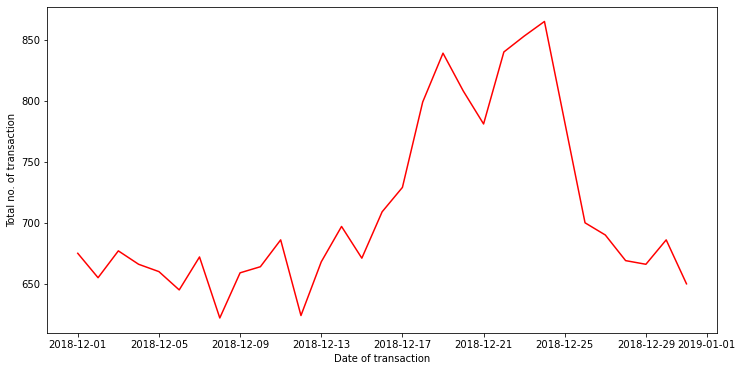

In [ ]:
plt.figure(figsize=(12,6))

plt.plot('actual_date','TXN_ID',data=c,color='red')

plt.xlabel('Date of transaction')
plt.ylabel('Total no. of transaction')

plt.show()

### Plotting bar chart for same

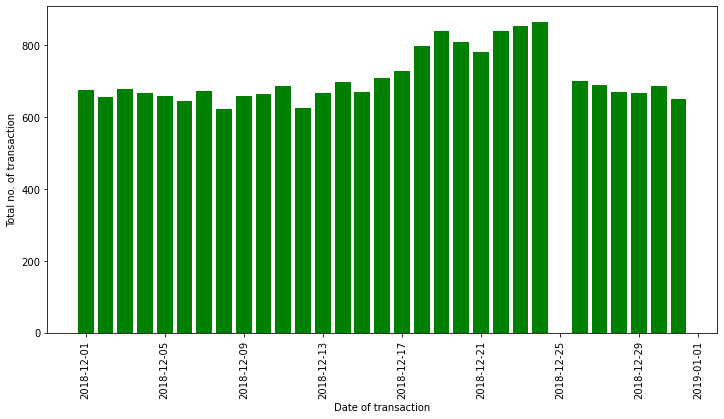

In [ ]:
plt.figure(figsize=(12,6))

plt.bar('actual_date','TXN_ID',data=c,color='green')

plt.xlabel('Date of transaction')
plt.ylabel('Total no. of transaction')

plt.xticks(rotation=90)

plt.show();

#### Observation:
As we can see from bar graph as festival and vacation is coming nearby no of per day number of transaction increases .
On 25th December as it is public holiday there are zero transaction processed.

### Transaction Analysis by pack size

In [ ]:
## Create the column pack size in datafrane

df_transcation['PACK_SIZE']=df_transcation['PROD_NAME'].str.extract(r'(\d+g|\d+G)')
df_transcation['PACK_SIZE']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: PACK_SIZE, Length: 246740, dtype: object

In [ ]:
df_transcation['PACK_SIZE'].isnull().sum()

0

In [ ]:
df_transcation['PACK_SIZE'].unique()

array(['175g', '170g', '150g', '330g', '210g', '210G', '270g', '220g',
       '125g', '110g', '134g', '150G', '175G', '380g', '180g', '165g',
       '135g', '250g', '200g', '160g', '190g', '90g', '70g'], dtype=object)

- There are some irregularities in pack size we created . Such as there are similar type of packages are there are double entry such as 150g and 150G . So we will correct all with such errors.

In [ ]:
df_transcation['PACK_SIZE']=df_transcation['PACK_SIZE'].replace('210G','210g')
df_transcation['PACK_SIZE']=df_transcation['PACK_SIZE'].replace('150G','150g')
df_transcation['PACK_SIZE']=df_transcation['PACK_SIZE'].replace('175G','175g')

In [ ]:
df_transcation['PACK_SIZE'].unique()

array(['175g', '170g', '150g', '330g', '210g', '270g', '220g', '125g',
       '110g', '134g', '380g', '180g', '165g', '135g', '250g', '200g',
       '160g', '190g', '90g', '70g'], dtype=object)

In [ ]:
d=df_transcation.groupby('PACK_SIZE')['TXN_ID'].count().reset_index()
d

,PACK_SIZE,TXN_ID
0,110g,22387
1,125g,1454
2,134g,25102
3,135g,3257
4,150g,40203
5,160g,2970
6,165g,15297
7,170g,19983
8,175g,66390
9,180g,1468


### Distribution of all transaction by pack size

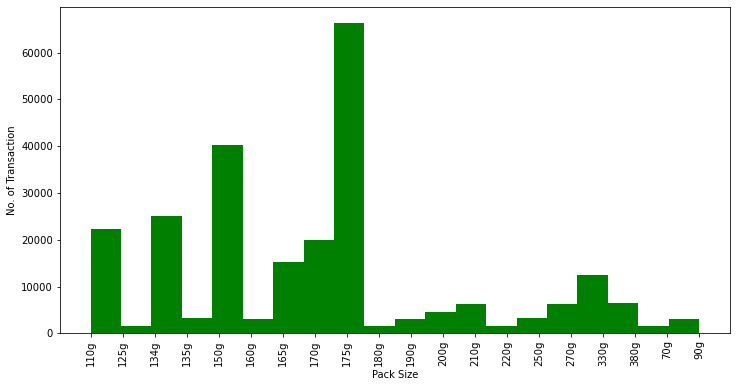

In [ ]:
plt.figure(figsize=(12,6))

plt.hist(d['PACK_SIZE'], bins=len(d), weights=d['TXN_ID'],color='green')

plt.xlabel('Pack Size')
plt.ylabel('No. of Transaction')

plt.xticks(rotation=90);

#### Observation
- From graph it is clearly visible that largest pack size is 380 g and smallest pack size id 70 g.
- Highest selling pack is 175 g and least selling pack is 125 g .
- Also there is good no of transaction for pack sizes like 110 g, 134 g ,150 g,165 g, 170 g and 270 g.

### Creating Brand name column

In [ ]:
df_transcation['Brand'] = df_transcation['PROD_NAME'].str.split().str[:2].str.join(' ')

In [ ]:
df_transcation['Brand'].unique()

array(['Natural Chip', 'CCs Nacho', 'Smiths Crinkle', 'Smiths Chip',
       'Kettle Tortilla', 'Grain Waves', 'Doritos Corn',
       'Kettle Sensations', 'Twisties Cheese', 'WW Crinkle',
       'Thins Chips', 'CCs Original', 'Burger Rings', 'NCC Sour',
       'Cheezels Cheese', 'Infzns Crn', 'Kettle Sea', 'Kettle Original',
       'Red Rock', 'Pringles Sthrn', 'Pringles Sweet&Spcy',
       'Smiths Thinly', 'Kettle Chilli', 'Doritos Mexicana',
       'Natural ChipCo', 'Dorito Corn', 'Twisties Chicken270g',
       'Kettle Mozzarella', 'Infuzions Thai', 'Smith Crinkle',
       'Kettle Honey', 'Infuzions BBQ', 'GrnWves Plus', 'Tyrrells Crisps',
       'Kettle Sweet', 'Kettle 135g', 'Pringles SourCream', 'Cobs Popd',
       'French Fries', 'Pringles Original', 'RRD Chilli&', 'WW Original',
       'Thins Potato', 'Smiths Crnkle', 'WW D/Style', 'Pringles Chicken',
       'Tostitos Lightly', 'Cheetos Puffs', 'RRD Sweet',
       'Tostitos Splash', 'CCs Tasty', 'Woolworths Cheese',
       'Tosti

#### Observation
 - From data it is looking like bands have been stored in different style of name. Such as Grain Waves and Gws, Sunbites and Snbts , we will replace all such names by on single name.

 - Also remove any additional details of flavors and type associated with brand name.

In [ ]:
df_transcation['Brand'] = df_transcation['Brand'].str.replace(r'\bNatural\b', 'Natural Chips')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Natural.*', 'Natural Chips')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*RRD.*', 'RRD')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Red Rock.*', 'RRD')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Doritos.*', 'Doritos')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Kettle.*', 'Kettle')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Smith.*', 'Smiths')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Tostitos.*', 'Tostitos')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Pringles.*', 'Pringles')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*CCs.*', 'CCs')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Infuzions.*', 'Infuzions')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Twisties.*', 'Twisties')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*WW.*', 'WW')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Thins.*', 'Thins')

/tmp/ipykernel_45/1239118926.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace(r'\bNatural\b', 'Natural Chips')
/tmp/ipykernel_45/1239118926.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Natural.*', 'Natural Chips')
/tmp/ipykernel_45/1239118926.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*RRD.*', 'RRD')
/tmp/ipykernel_45/1239118926.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Red Rock.*', 'RRD')
/tmp/ipykernel_45/1239118926.py:5: FutureWarning: The default value of regex will change from True to False in a future ve

In [ ]:
df_transcation['Brand'].unique()

array(['Natural Chips', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger Rings', 'NCC Sour',
       'Cheezels Cheese', 'Infzns Crn', 'RRD', 'Pringles', 'Dorito Corn',
       'Infuzions', 'GrnWves Plus', 'Tyrrells Crisps', 'Cobs Popd',
       'French Fries', 'Tostitos', 'Cheetos Puffs', 'Woolworths Cheese',
       'Snbts Whlgrn', 'Cheetos Chs', 'Sunbites Whlegrn'], dtype=object)

#### Observation

- Still there are some inconsistency in the brand names. so it need to be cleared.

In [ ]:
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Dorito.*', 'Doritos')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*GrnWves.*', 'Grain Waves')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*NCC.*', 'NCC')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Sunbites.*', 'Sunbites')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Snbts.*', 'Sunbites')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Cheezels Cheese.*', 'Cheezels')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Infzns.*', 'Infuzions')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Tyrrells Crisps.*', 'Tyrrells')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Cobs Popd.*', 'Cobs')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Cheetos.*', 'Cheetos')
df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Woolworths Cheese.*', 'Woolworths')

/tmp/ipykernel_45/3951155728.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Dorito.*', 'Doritos')
/tmp/ipykernel_45/3951155728.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*GrnWves.*', 'Grain Waves')
/tmp/ipykernel_45/3951155728.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*NCC.*', 'NCC')
/tmp/ipykernel_45/3951155728.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transcation['Brand'] = df_transcation['Brand'].str.replace('.*Sunbites.*', 'Sunbites')
/tmp/ipykernel_45/3951155728.py:5: FutureWarning: The default value of regex will change from True to False in a future version

In [ ]:
df_transcation['Brand'].unique()

array(['Natural Chips', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger Rings', 'NCC',
       'Cheezels', 'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs',
       'French Fries', 'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'],
      dtype=object)

### Assessing Customer dataset

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df_customers.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [ ]:
## total no fo customers

len(df_customers['LYLTY_CARD_NBR'].unique())

print('Total number of customers with loyalty card is:',len(df_customers['LYLTY_CARD_NBR'].unique()),'.')

Total number of customers with loyalty card is: 72637 .


### Histogram to check distribution of customers

In [ ]:
df_lifestage=df_customers.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count().reset_index()
df_lifestage

,LIFESTAGE,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,7275
1,NEW FAMILIES,2549
2,OLDER FAMILIES,9780
3,OLDER SINGLES/COUPLES,14609
4,RETIREES,14805
5,YOUNG FAMILIES,9178
6,YOUNG SINGLES/COUPLES,14441


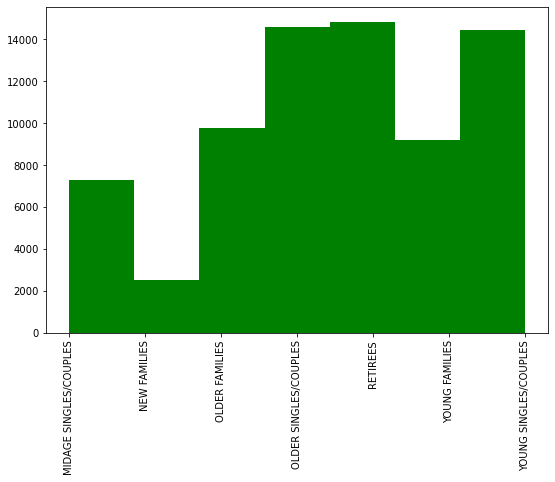

In [ ]:
plt.figure(figsize=(9,6))

plt.hist(df_lifestage['LIFESTAGE'], bins=len(df_lifestage), weights=df_lifestage['LYLTY_CARD_NBR'],color='green')

plt.xticks(rotation=90);

In [ ]:
df_premiumcustomer=df_customers.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].count().reset_index()
df_premiumcustomer

,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,Budget,24470
1,Mainstream,29245
2,Premium,18922


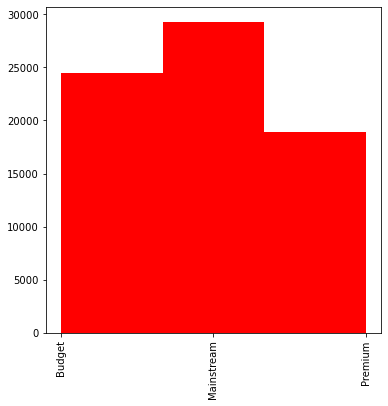

In [ ]:
plt.figure(figsize=(6,6))

plt.hist(df_premiumcustomer['PREMIUM_CUSTOMER'], bins=len(df_premiumcustomer), weights=df_premiumcustomer['LYLTY_CARD_NBR'],color='red')

plt.xticks(rotation=90);

<AxesSubplot:>

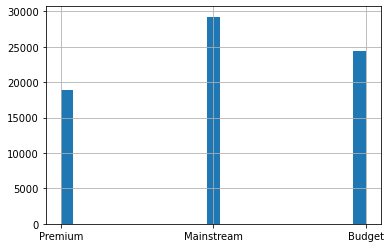

In [ ]:
df_customers['PREMIUM_CUSTOMER'].hist(bins=25)

<AxesSubplot:xlabel='LIFESTAGE', ylabel='Count'>

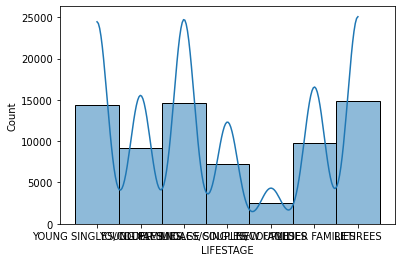

In [ ]:
sns.histplot(df_customers['LIFESTAGE'],bins=30,kde=True)

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='Count'>

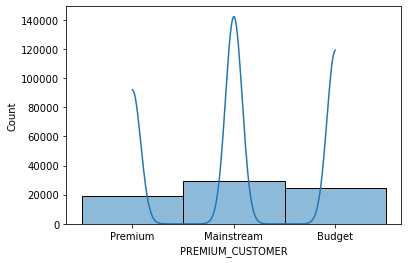

In [ ]:
sns.histplot(df_customers['PREMIUM_CUSTOMER'],bins=30,kde=True)

<AxesSubplot:xlabel='LYLTY_CARD_NBR', ylabel='Count'>

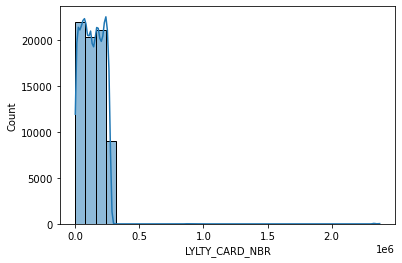

In [ ]:
sns.histplot(df_customers['LYLTY_CARD_NBR'],bins=30,kde=True)

### Merging two datasets

In [ ]:
### Merge function to join two dataset

df=df_transcation.merge(df_customers, on ='LYLTY_CARD_NBR')
df

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175g,Natural Chips,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,160g,WW,MIDAGE SINGLES/COUPLES,Budget
3,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,175g,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,170g,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,150g,Doritos,YOUNG SINGLES/COUPLES,Premium


In [ ]:
### Check for null or missing values in new dataset

df.isnull().sum()

STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
actual_date         0
PACK_SIZE           0
Brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### Observation
After merging two dataset there are no null or nan values present in newly created dataset.

###  Analysis for the final dataset

### Purchase of chips on basis of Lifestage of customer

In [ ]:
## Describe lifestage wise , how premium their purchasing behavious is?

Highest_spend = df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)
Highest_spend

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,376019.65
4,RETIREES,342381.90
2,OLDER FAMILIES,328519.90
5,YOUNG FAMILIES,294627.90
6,YOUNG SINGLES/COUPLES,243756.60
0,MIDAGE SINGLES/COUPLES,172523.80
1,NEW FAMILIES,47347.95


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


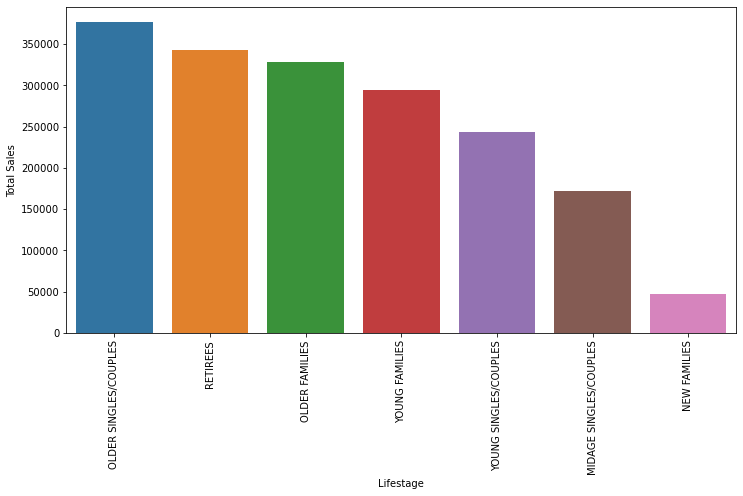

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','TOT_SALES',data=Highest_spend)

plt.xlabel('Lifestage')
plt.ylabel('Total Sales')

plt.xticks(rotation=90)

plt.show();

#### Observation
- Maximum revenue is coming for Older Singles/Couples.
- New Families is contributing least in the sales of chips.

In [ ]:
### include category of customers in spending pattern

Highest_spend_category=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)
Highest_spend_category

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


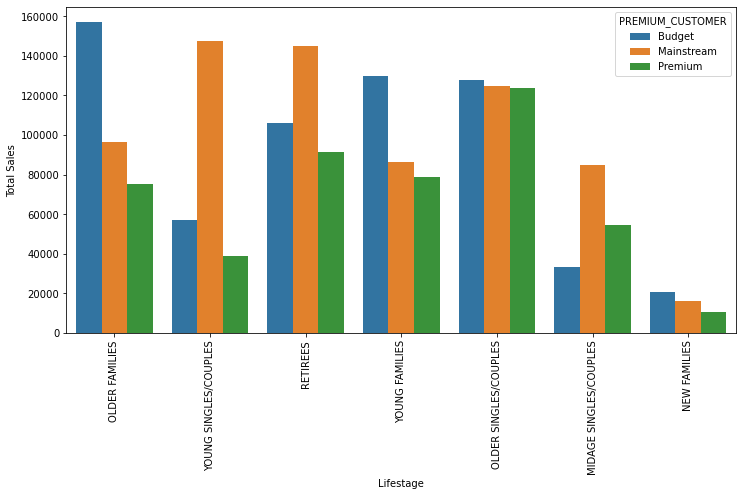

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','TOT_SALES',data=Highest_spend_category,hue='PREMIUM_CUSTOMER')

plt.xlabel('Lifestage')
plt.ylabel('Total Sales')

plt.xticks(rotation=90)

plt.show();

#### Observation
- In older Families and young customer from budget segment is been contributing maximum to sales comparing to other segments.
- in young singles/couples , retirees, middle singles and couples mainstream customer segment is giving maximum sales.

### Total number of unique customers in each category

In [ ]:
### Total number of customers by lifestage

customer_by_lifestage=df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().reset_index().sort_values(by='LYLTY_CARD_NBR',ascending=False)
customer_by_lifestage

,LIFESTAGE,LYLTY_CARD_NBR
4,RETIREES,14555
3,OLDER SINGLES/COUPLES,14389
6,YOUNG SINGLES/COUPLES,14044
2,OLDER FAMILIES,9630
5,YOUNG FAMILIES,9036
0,MIDAGE SINGLES/COUPLES,7141
1,NEW FAMILIES,2492


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


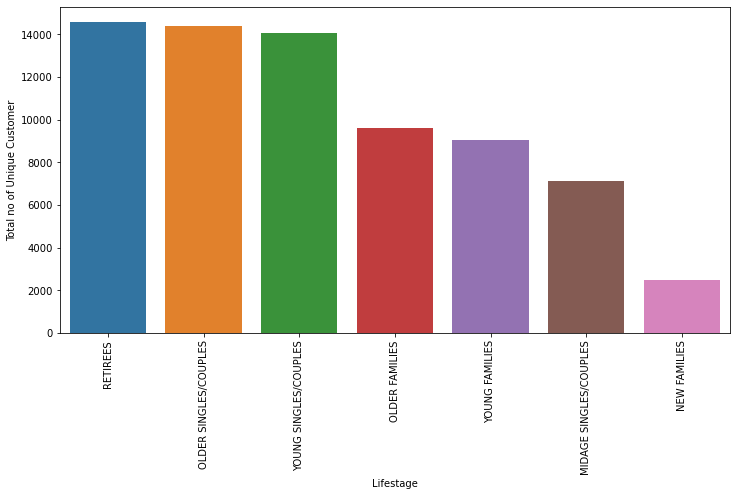

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','LYLTY_CARD_NBR',data=customer_by_lifestage)

plt.xlabel('Lifestage')
plt.ylabel('Total no of Unique Customer')

plt.xticks(rotation=90)

plt.show();

#### Observation
- Most number of member with loyalty is from retirees group followed by older singles/couples and young single/couples
- New families has least number of fixed members with loyalty card.

### Unique number of customer by Premium category

In [ ]:
customer_by_Premium_cat=df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().reset_index().sort_values(by='LYLTY_CARD_NBR',ascending=False)
customer_by_Premium_cat

,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
1,Mainstream,28734
0,Budget,24006
2,Premium,18547


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


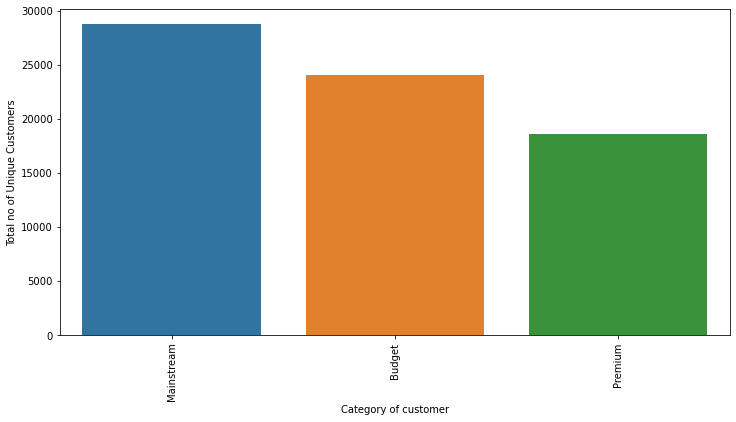

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('PREMIUM_CUSTOMER','LYLTY_CARD_NBR',data=customer_by_Premium_cat)

plt.xlabel('Category of customer')
plt.ylabel('Total no of Unique Customers')


plt.xticks(rotation=90)

plt.show();

#### Observation
- Mainstream customer category has highest number of unique customers with loyalty card.
- Budget and premium category is been on 2nd and 3rd rank followed by Mainstream category.

### Total no of customer falling under Lifestage and Premium Customer segment

In [ ]:
customer_by_ovarall_cat=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index().sort_values(by='LYLTY_CARD_NBR',ascending=False)
customer_by_ovarall_cat

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
19,YOUNG SINGLES/COUPLES,Mainstream,7917
13,RETIREES,Mainstream,6358
10,OLDER SINGLES/COUPLES,Mainstream,4858
9,OLDER SINGLES/COUPLES,Budget,4849
11,OLDER SINGLES/COUPLES,Premium,4682
6,OLDER FAMILIES,Budget,4611
12,RETIREES,Budget,4385
15,YOUNG FAMILIES,Budget,3953
14,RETIREES,Premium,3812
18,YOUNG SINGLES/COUPLES,Budget,3647


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


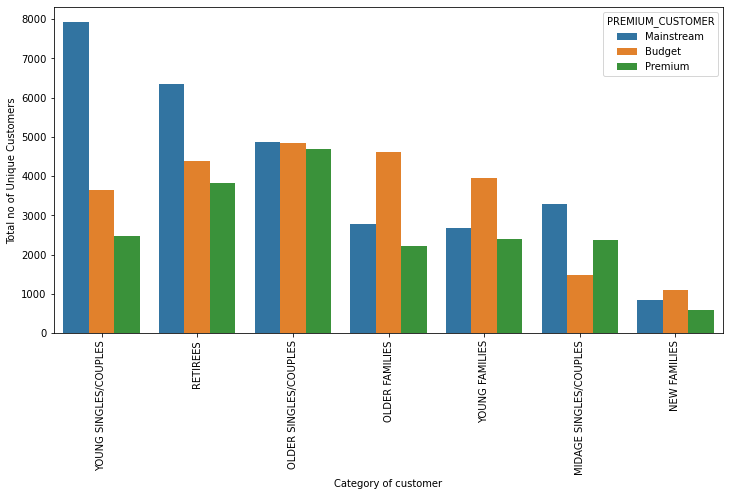

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','LYLTY_CARD_NBR',data=customer_by_ovarall_cat,hue='PREMIUM_CUSTOMER')


plt.xlabel('Category of customer')
plt.ylabel('Total no of Unique Customers')


plt.xticks(rotation=90);

#### Observation
- From the Mainstream and young singles/couples most no of customers purchase chips.
- Also retirees , older singles/couples , midage singles/couples most number of customers fall in mainstream category.
- New families have least number of customers in each category.

###  Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
df.columns

Index(['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME',
       'PROD_QTY', 'TOT_SALES', 'actual_date', 'PACK_SIZE', 'Brand',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [ ]:
## PROD_QTY, LYLTY_CARD_NUMBER , Li,PC

### AVg no of units = sum of units / Total customer

## Avg no of units = df['PROD_QTY'].sum() / df['LYLTY_CARD_NBR'].nunique()

Avg_units = df[['LYLTY_CARD_NBR','PREMIUM_CUSTOMER','LIFESTAGE','PROD_QTY']]

In [ ]:
cutsomers_per_unit=Avg_units.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
cutsomers_per_unit

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


In [ ]:
Quantity_purchased=Avg_units.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
Quantity_purchased

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,21213
2,MIDAGE SINGLES/COUPLES,Premium,14400
3,NEW FAMILIES,Budget,5241
4,NEW FAMILIES,Mainstream,4060
5,NEW FAMILIES,Premium,2769
6,OLDER FAMILIES,Budget,41853
7,OLDER FAMILIES,Mainstream,25804
8,OLDER FAMILIES,Premium,20239
9,OLDER SINGLES/COUPLES,Budget,32883


In [ ]:
total_purchase=cutsomers_per_unit.merge(Quantity_purchased,on=['LIFESTAGE','PREMIUM_CUSTOMER'])

In [ ]:
total_purchase

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,1474,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,3298,21213
2,MIDAGE SINGLES/COUPLES,Premium,2369,14400
3,NEW FAMILIES,Budget,1087,5241
4,NEW FAMILIES,Mainstream,830,4060
5,NEW FAMILIES,Premium,575,2769
6,OLDER FAMILIES,Budget,4611,41853
7,OLDER FAMILIES,Mainstream,2788,25804
8,OLDER FAMILIES,Premium,2231,20239
9,OLDER SINGLES/COUPLES,Budget,4849,32883


In [ ]:
total_purchase['avg_no_of_units']= total_purchase['PROD_QTY'] / total_purchase['LYLTY_CARD_NBR']
total_purchase

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY,avg_no_of_units
0,MIDAGE SINGLES/COUPLES,Budget,1474,8883,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,3298,21213,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,2369,14400,6.078514
3,NEW FAMILIES,Budget,1087,5241,4.821527
4,NEW FAMILIES,Mainstream,830,4060,4.891566
5,NEW FAMILIES,Premium,575,2769,4.815652
6,OLDER FAMILIES,Budget,4611,41853,9.076773
7,OLDER FAMILIES,Mainstream,2788,25804,9.255380
8,OLDER FAMILIES,Premium,2231,20239,9.071717
9,OLDER SINGLES/COUPLES,Budget,4849,32883,6.781398


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


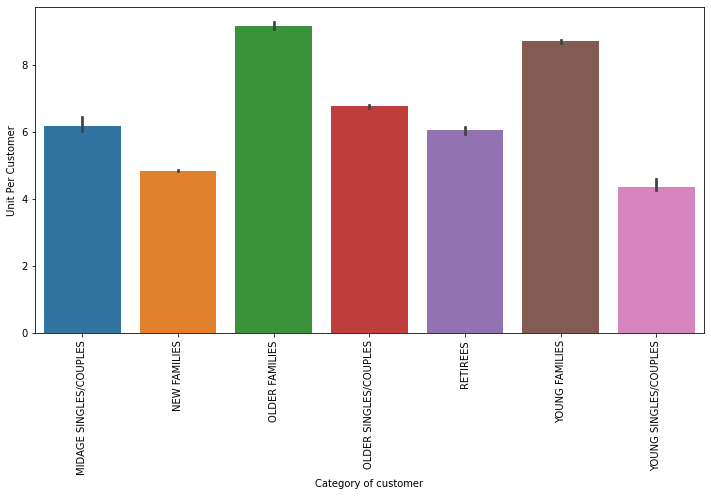

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','avg_no_of_units',data=total_purchase)

plt.xlabel('Category of customer')
plt.ylabel('Unit Per Customer')

plt.xticks(rotation=90)

plt.show();

#### Observation
- Older Families and Young Families have highest units per customers.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


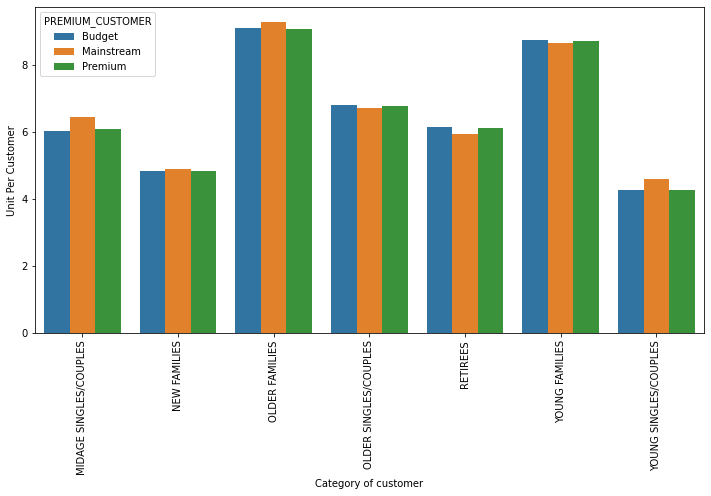

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','avg_no_of_units',data=total_purchase,hue='PREMIUM_CUSTOMER')

plt.xlabel('Category of customer')
plt.ylabel('Unit Per Customer')

plt.xticks(rotation=90);

#### Observation
- Premium Customer segment wise also Older families and Young families have more units per customers.

### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
segmentwise_qty=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
segmentwise_qty

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,21213
2,MIDAGE SINGLES/COUPLES,Premium,14400
3,NEW FAMILIES,Budget,5241
4,NEW FAMILIES,Mainstream,4060
5,NEW FAMILIES,Premium,2769
6,OLDER FAMILIES,Budget,41853
7,OLDER FAMILIES,Mainstream,25804
8,OLDER FAMILIES,Premium,20239
9,OLDER SINGLES/COUPLES,Budget,32883


In [ ]:
## create matrix for total price customer segment wise

sales_segment_wise=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_segment_wise

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [ ]:
avg_unit_price_segmentwise=segmentwise_qty.merge(sales_segment_wise,on=['LIFESTAGE','PREMIUM_CUSTOMER'])
avg_unit_price_segmentwise

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,8883,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,14400,54443.85
3,NEW FAMILIES,Budget,5241,20607.45
4,NEW FAMILIES,Mainstream,4060,15979.70
5,NEW FAMILIES,Premium,2769,10760.80
6,OLDER FAMILIES,Budget,41853,156863.75
7,OLDER FAMILIES,Mainstream,25804,96413.55
8,OLDER FAMILIES,Premium,20239,75242.60
9,OLDER SINGLES/COUPLES,Budget,32883,127833.60


In [ ]:
avg_unit_price_segmentwise['Avg_price_unit']=avg_unit_price_segmentwise['TOT_SALES']/avg_unit_price_segmentwise['PROD_QTY']
avg_unit_price_segmentwise

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,Avg_price_unit
0,MIDAGE SINGLES/COUPLES,Budget,8883,33345.70,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,14400,54443.85,3.780823
3,NEW FAMILIES,Budget,5241,20607.45,3.931969
4,NEW FAMILIES,Mainstream,4060,15979.70,3.935887
5,NEW FAMILIES,Premium,2769,10760.80,3.886168
6,OLDER FAMILIES,Budget,41853,156863.75,3.747969
7,OLDER FAMILIES,Mainstream,25804,96413.55,3.736380
8,OLDER FAMILIES,Premium,20239,75242.60,3.717703
9,OLDER SINGLES/COUPLES,Budget,32883,127833.60,3.887529


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


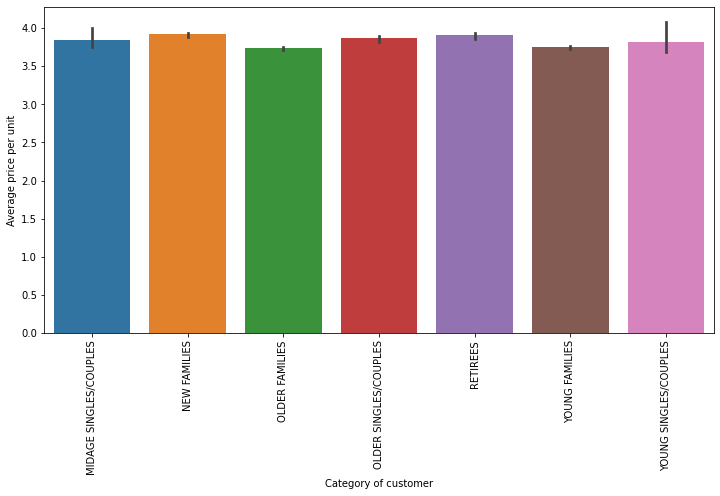

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot('LIFESTAGE','Avg_price_unit',data=avg_unit_price_segmentwise)

plt.xlabel('Category of customer')
plt.ylabel('Average price per unit')

plt.xticks(rotation=90)

plt.show();

#### Observation
- As we can see there is no much difference in avg price per unit for any category in lifestage segment. We will drill down by premium customer segment to get the better information regarding average price per unit.

### Average price per unit of chips for each segment of customers

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


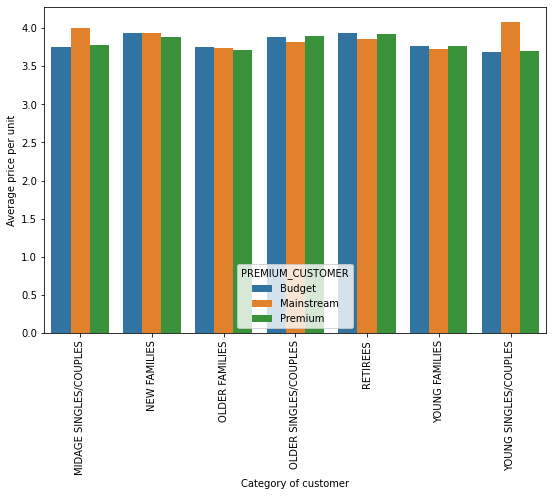

In [ ]:
plt.figure(figsize=(9,6))

sns.barplot('LIFESTAGE','Avg_price_unit',data=avg_unit_price_segmentwise,hue='PREMIUM_CUSTOMER')

plt.xlabel('Category of customer')
plt.ylabel('Average price per unit')

plt.xticks(rotation=90);

#### Observation
- Mainstream Midage Singles/Couples and Young Singles  have maximum average price per unit of chips.

- The other categories also not have huge difference in average price compare to this two categories . As Avg price is driving factors in sales analysis we will do hypothesis testing to see if there is significant difference is there between Mainstream and other categories , Hypothesis T test will be carried out to assess difference statistically.

In [ ]:
df.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175g,Natural Chips,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,160g,WW,MIDAGE SINGLES/COUPLES,Budget
3,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
avg_unit_price_segmentwise[avg_unit_price_segmentwise['PREMIUM_CUSTOMER']== 'Mainstream']

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,Avg_price_unit
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,3.994449
4,NEW FAMILIES,Mainstream,4060,15979.70,3.935887
7,OLDER FAMILIES,Mainstream,25804,96413.55,3.736380
10,OLDER SINGLES/COUPLES,Mainstream,32607,124648.50,3.822753
13,RETIREES,Mainstream,37677,145168.95,3.852986
16,YOUNG FAMILIES,Mainstream,23194,86338.25,3.722439
19,YOUNG SINGLES/COUPLES,Mainstream,36225,147582.20,4.074043


### Hypothesis Testing for unit price

In [ ]:
## Create the copy of dataframe to perfrom test onn it

df_1=df.copy()

In [ ]:
df_1['unit_price']=df_1['TOT_SALES']/df_1['PROD_QTY']

In [ ]:
df_1

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER,unit_price
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175g,Natural Chips,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,160g,WW,MIDAGE SINGLES/COUPLES,Budget,1.90
3,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,175g,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40
246736,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
246737,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,170g,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
246738,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,150g,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90


In [ ]:
## Mainstream cutomers consist of Young Sinlges/Couples and Midage Singles / Couples

df_1_mainstream=df_1[((df_1['PREMIUM_CUSTOMER']=='Mainstream') & ((df_1['LIFESTAGE']=='YOUNG SINGLES/COUPLES') | (df_1['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')))]
df_1_mainstream

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER,unit_price
4692,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,2019-05-18,170g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,3,3159,1757,36,Kettle Chilli 175g,2,10.8,2019-03-23,175g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4694,3,3159,1758,81,Pringles Original Crisps 134g,2,7.4,2019-05-10,134g,Pringles,MIDAGE SINGLES/COUPLES,Mainstream,3.7
4695,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,2019-05-16,170g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,3,3294,2369,114,Kettle Sensations Siracha Lime 150g,2,9.2,2019-04-22,150g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240884,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2018-12-01,110g,Cobs,YOUNG SINGLES/COUPLES,Mainstream,3.8
240885,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,2018-07-27,150g,Kettle,YOUNG SINGLES/COUPLES,Mainstream,4.6
240886,272,272389,270201,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,2018-11-10,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7
240887,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,2019-04-01,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [ ]:
### Budget nad premium category of customers of Young Singles/Couples and Midage Singles/Couples

df_1_bdpm=df_1[(((df_1['PREMIUM_CUSTOMER']=='Budget') | (df_1['PREMIUM_CUSTOMER']=='Premium')) & ((df_1['LIFESTAGE']=='YOUNG SINGLES/COUPLES') | (df_1['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')))]
df_1_bdpm

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,actual_date,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER,unit_price
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175g,Natural Chips,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,160g,WW,MIDAGE SINGLES/COUPLES,Budget,1.90
3,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,175g,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40
246736,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
246737,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,170g,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
246738,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,150g,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90


In [ ]:
### Group 1 for mainstream customers

gr1_main=df_1_mainstream['unit_price']
df_1_mainstream['unit_price'].mean()
gr1_main.to_list()

[4.4,
 5.4,
 3.7,
 4.4,
 4.6,
 5.4,
 4.4,
 4.4,
 3.7,
 3.3,
 3.8,
 4.6,
 3.7,
 3.3,
 5.7,
 4.6,
 3.7,
 4.4,
 4.4,
 3.9,
 5.4,
 5.4,
 4.4,
 5.7,
 4.6,
 4.6,
 3.0,
 3.0,
 4.6,
 3.3,
 4.6,
 3.7,
 4.2,
 3.8,
 4.4,
 5.4,
 3.9,
 2.9,
 5.9,
 2.7,
 4.4,
 1.9,
 5.9,
 4.4,
 5.4,
 5.4,
 3.0,
 4.6,
 3.0,
 2.9,
 2.1,
 3.0,
 3.7,
 2.6,
 1.8,
 2.8,
 4.2,
 3.0,
 5.7,
 3.25,
 4.3,
 3.3,
 3.8,
 4.6,
 4.6,
 5.7,
 4.2,
 4.2,
 3.8,
 4.2,
 5.4,
 5.7,
 5.4,
 4.4,
 4.6,
 3.0,
 3.8,
 3.6,
 4.3,
 4.2,
 3.7,
 5.4,
 3.7,
 3.7,
 4.6,
 2.8,
 3.0,
 5.4,
 3.8,
 5.4,
 5.4,
 3.0,
 3.8,
 4.4,
 3.0,
 3.7,
 3.0,
 2.9,
 5.4,
 4.6,
 2.8,
 4.4,
 5.9,
 5.4,
 2.7,
 5.4,
 4.6,
 2.6,
 5.4,
 3.7,
 3.6,
 2.9,
 5.7,
 3.0,
 2.1,
 4.6,
 2.1,
 3.0,
 2.9,
 2.9,
 3.0,
 3.0,
 2.1,
 3.0,
 3.7,
 4.4,
 5.7,
 3.9,
 3.8,
 4.6,
 5.4,
 5.7,
 3.8,
 4.4,
 4.6,
 4.6,
 3.8,
 5.7,
 5.4,
 3.9,
 4.4,
 5.7,
 3.8,
 3.7,
 4.4,
 3.6,
 3.6,
 4.2,
 4.4,
 2.6,
 2.6,
 3.0,
 3.3,
 3.0,
 4.2,
 3.7,
 3.7,
 3.0,
 2.7,
 5.9,
 3.0,
 3.6,
 4.3,
 3.7,
 2.9,
 2.6,
 3.

In [ ]:
### Group 2 of BUdget and premium customers

gr2_bdpm=df_1_bdpm['unit_price']
df_1_bdpm['unit_price'].mean()
gr2_bdpm.to_list()

[3.0,
 2.1,
 1.9,
 2.1,
 1.45,
 3.0,
 4.6000000000000005,
 5.7,
 5.4,
 4.2,
 3.8,
 3.6,
 3.9,
 4.6,
 3.3,
 3.9,
 2.7,
 3.1,
 1.9,
 3.3,
 3.6,
 4.4,
 3.8,
 3.8,
 3.8,
 4.6,
 5.7,
 5.4,
 4.6,
 4.6,
 3.7,
 4.6,
 3.3,
 3.8,
 4.6,
 3.6,
 1.7,
 3.0,
 4.4,
 3.0,
 4.4,
 3.3,
 5.7,
 3.8,
 5.4,
 4.4,
 2.1,
 2.7,
 2.7,
 2.3,
 3.0,
 3.9,
 2.6,
 3.0,
 2.1,
 2.1,
 2.6,
 3.7,
 4.6,
 3.7,
 5.7,
 3.0,
 4.4,
 3.7,
 1.9,
 3.8,
 3.8,
 5.4,
 4.2,
 3.8,
 3.7,
 4.4,
 3.7,
 3.7,
 5.4,
 5.4,
 4.6,
 2.9,
 3.0,
 4.6,
 3.7,
 3.8,
 3.8,
 4.2,
 3.0,
 3.0,
 5.4,
 5.4,
 1.9,
 4.6,
 1.9,
 2.7,
 3.8,
 5.4,
 4.6,
 3.9,
 3.8,
 4.6,
 3.7,
 3.0,
 3.8,
 4.4,
 2.7,
 5.7,
 2.1,
 2.9,
 3.7,
 5.4,
 5.7,
 4.6,
 3.1,
 3.3,
 3.0,
 4.6,
 5.4,
 2.9,
 2.7,
 3.0,
 3.0,
 5.4,
 3.7,
 4.4,
 3.3,
 5.4,
 5.4,
 4.6,
 2.6,
 3.0,
 3.7,
 4.2,
 2.1,
 3.25,
 4.6,
 3.7,
 2.1,
 3.7,
 5.4,
 4.6,
 5.7,
 3.0,
 5.4,
 4.6,
 4.6,
 2.7,
 4.4,
 2.7,
 5.4,
 3.3,
 3.8,
 3.8,
 5.7,
 5.7,
 3.8,
 6.5,
 4.6,
 1.7,
 3.8,
 1.7,
 5.7,
 4.4,
 2.6,
 3.9,
 2.3,
 5.4,

### Hypothesis Creation

- As we have to assess statistical difference between two groups we will create two hypothesis based on that.

### Null Hypothesis(H0)

H0: There is not any significant difference in average price per unit sold among Mainstream Midage and Young Singles/Couples and Budget and premium Midage and Young Singles/Couples.

### Alternate Hypothesis(H1)

H1: There is significant difference in average price per unit sold among Mainstream Midage and Young Singles/Couples and Budget and premium Midage and Young Singles/Couples.

### P value for T test

In [ ]:
t_statistic, p_value = stats.ttest_ind(a=gr1_main,b=gr2_bdpm,equal_var=False)

In [ ]:
p_value

6.967354232991983e-306

In [ ]:
rounded_p_value = round(p_value, 3)
print(rounded_p_value)

0.0


### Observation

- As p value is less than 0.05 we reject null hypothesis.
- By rejecting null hypothesis it is possible to say that there is significant difference in average price per unit sold among mainstream young and midage singles/couples and budget and premium segment of customers.

In [ ]:
t_statistic

37.6243885962296

-  Large t-statistic value of 37.6243885962296 indicates a substantial difference between the means of the two groups.